## [Geometric Operations](https://autogis-site.readthedocs.io/en/latest/notebooks/L4/geometric-operations.html)

### overlay analysis

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
import os
%matplotlib inline

In [2]:
# filepath of data
border_file = 'data/Helsinki_borders.shp'
grid_file = 'data/TravelTimes_to_5975375_RailwayStation.shp'

In [3]:
# read files
def read_data(path, driver=None):
    assert os.path.isfile(path), 'Input must be a valid file'
    return gpd.read_file(path) if driver is None else \
        gpd.read_file(path, driver=driver)

grid = read_data(grid_file)
helsinki = read_data(border_file)

- quick visualization of the two layers

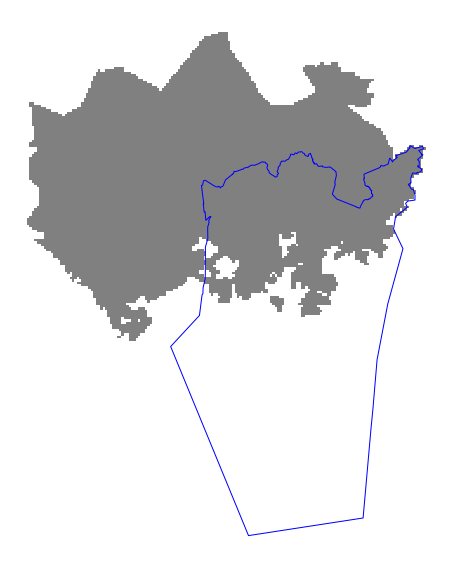

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
grid.plot(ax=ax, facecolor='gray')
helsinki.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.axis('off')
plt.tight_layout()

- when conducting overlay analysis, we have to make sure the data is in the same CRS

In [5]:
assert grid.crs == helsinki.crs, 'All geodata must be in the same CRS'

- now we do the overlay analysis. we use the `overlay()` function for that
the different types of overlay we can do are
  - `intersection`, `union`, `symmetric_difference`, `difference` and `identity`

In [7]:
intersection = gpd.overlay(grid, helsinki, how='intersection')

<AxesSubplot:>

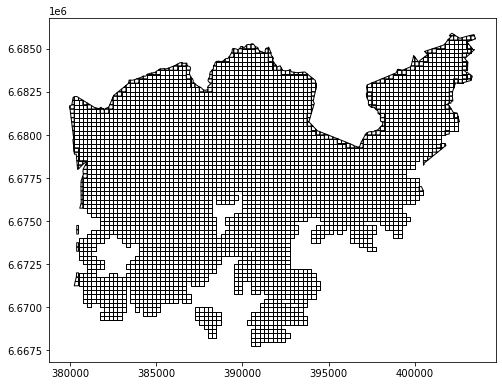

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
intersection.plot(ax=ax, color='None', edgecolor='black')

In [14]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


- save file as geojson

In [17]:
output_file = 'data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'
intersection.to_file(output_file, driver='GeoJSON')

C:\ProgramData\Anaconda3\envs\autogis_lesson2\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Aggregating Data

In [20]:
dissolved = intersection.dissolve(by='car_r_t')
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((388000.000 6668750.000, 387750...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((386000.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386250.000 6671500.000, 386000...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((386500.000 6671250.000, 386250...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


In [22]:
print(f"Rown in original intersection GeoDataFrame: {len(intersection)}")
print(f"Rows in dissolved layer: {len(dissolved)}")

Rown in original intersection GeoDataFrame: 3826
Rows in dissolved layer: 51


In [23]:
dissolved.columns

Index(['geometry', 'car_m_d', 'car_m_t', 'car_r_d', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'GML_ID', 'NAMEFIN', 'NAMESWE', 'NATCODE'],
      dtype='object')

In [24]:
dissolved.loc[15]

geometry    (POLYGON ((387750.0001355155 6669250.000042822...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
pt_m_d                                                   6858
pt_m_t                                                     26
pt_m_tt                                                    30
pt_r_d                                                   6858
pt_r_t                                                     27
pt_r_tt                                                    32
to_id                                                 5975375
walk_d                                                   6757
walk_t                                                     97
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [26]:
selection = gpd.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

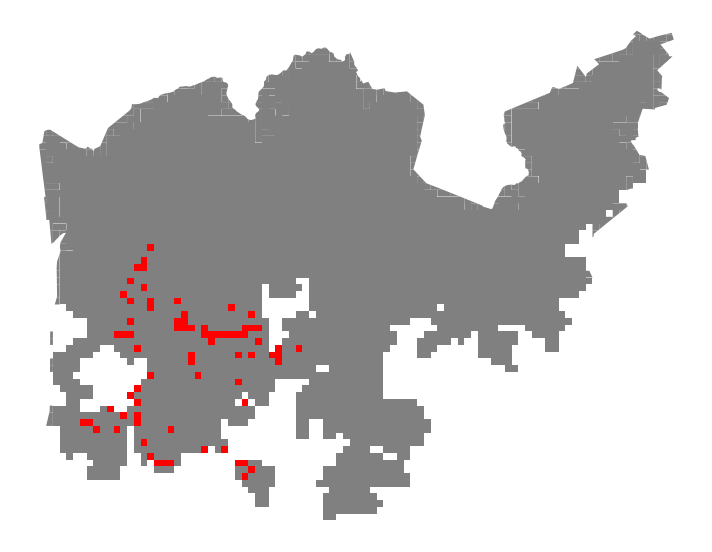

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
dissolved.plot(ax=ax, facecolor='gray')
selection.plot(ax=ax, facecolor='red')
plt.axis('off')
plt.tight_layout()

### simplifying geometries with python

In [49]:
amazon_data = read_data('data/Amazon_river.shp')
amazon_data.crs

<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

In [50]:
amazon_data.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


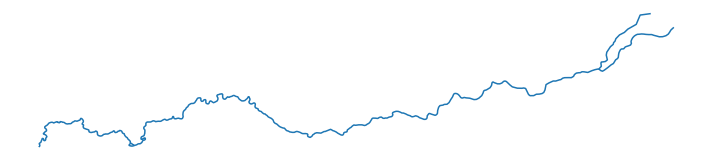

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
amazon_data.plot(ax=ax)
plt.axis('off')
plt.tight_layout()

- Generalization can be done easily by using a Shapely function called .simplify(). The tolerance parameter can be used to adjusts how much geometries should be generalized. The tolerance value is tied to the coordinate system of the geometries. Hence, the value we pass here is 20 000 meters (20 kilometers).

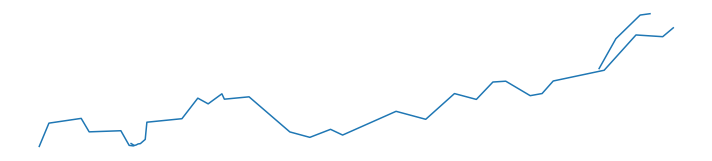

In [52]:
amazon_data['geom_gen'] = amazon_data.simplify(tolerance=20000)
amazon_data = amazon_data.set_geometry('geom_gen')

fig, ax = plt.subplots(figsize=(10, 10))
amazon_data.plot(ax=ax)
plt.axis('off')
plt.tight_layout()